# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#make url
url= 'http://api.openweathermap.org/data/2.5/weather?'
units='metric'
api_key ='72cf00cbec43f09c95599bc3ec026e76'
query_url = f'{url}appid={api_key}&units={units}&q='
response=requests.get(query_url + cities[0]).json()
response


{'coord': {'lon': 13.23, 'lat': -8.84},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 25,
  'feels_like': 28.28,
  'temp_min': 25,
  'temp_max': 25,
  'pressure': 1010,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 220},
 'clouds': {'all': 75},
 'dt': 1604719771,
 'sys': {'type': 1,
  'id': 2173,
  'country': 'AO',
  'sunrise': 1604723808,
  'sunset': 1604768688},
 'timezone': 3600,
 'id': 2240449,
 'name': 'Luanda',
 'cod': 200}

In [5]:
#Lists for Dataframe
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_name = []
counter=0

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    
    # Try statement to append calls where value is found 
    try: 
        response = requests.get(query_url + city).json() 
        #print(response["name"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} | {city_record}")
       
        
        # Increase counter by one 
        counter= counter + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next city
    except:
        print("City not found. Skipping...")
        
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 0 | Luanda
Processing Record 1 | Kruisfontein
Processing Record 2 | Albany
Processing Record 3 | Egvekinot
Processing Record 4 | Khanbari
Processing Record 5 | Badarwās
Processing Record 6 | Tessalit
City not found. Skipping...
Processing Record 7 | Jamestown
Processing Record 8 | Hermanus
Processing Record 9 | East London
City not found. Skipping...
Processing Record 10 | Puerto Ayora
Processing Record 11 | Korem
Processing Record 12 | Kouango
Processing Record 13 | Bethel
Processing Record 14 | Kavieng
Processing Record 15 | Chapada dos Guimarães
Processing Record 16 | Albacete
Processing Record 17 | Belaya Gora
Processing Record 18 | Yellowknife
Processing Record 19 | Kaitangata
Processing Record 20 | Bluff
Processing Record 21 | Rikitea
City not found. Skipping...
Processing Record 22 | San Quintín
Processing Record 23 | Killybegs
Processing Record 24 | Manitouwadge
Processing Record 25 | Bam
Processing Reco

Processing Record 229 | Ketchikan
Processing Record 230 | Noumea
Processing Record 231 | Bunia
Processing Record 232 | Chui
Processing Record 233 | Berlevåg
Processing Record 234 | Rudnogorsk
Processing Record 235 | Arlit
Processing Record 236 | Tuatapere
Processing Record 237 | Thompson
Processing Record 238 | Manggar
Processing Record 239 | Pevek
Processing Record 240 | Ponta do Sol
Processing Record 241 | Pitimbu
Processing Record 242 | Esperance
Processing Record 243 | Guerrero Negro
Processing Record 244 | Pesqueira
Processing Record 245 | Tosu
Processing Record 246 | Hamilton
Processing Record 247 | Jijiga
Processing Record 248 | Nador
Processing Record 249 | Vestmannaeyjar
Processing Record 250 | Acajutla
Processing Record 251 | Kahului
Processing Record 252 | Champerico
Processing Record 253 | Hambantota
Processing Record 254 | Kirakira
Processing Record 255 | Batemans Bay
Processing Record 256 | Khatanga
Processing Record 257 | Samaná
Processing Record 258 | Shaowu
Processing 

Processing Record 462 | Parrita
Processing Record 463 | Erdenet
Processing Record 464 | Ozernovskiy
Processing Record 465 | Jablah
Processing Record 466 | Sisimiut
Processing Record 467 | Chiredzi
Processing Record 468 | Bilibino
Processing Record 469 | Port Lincoln
Processing Record 470 | Diu
Processing Record 471 | Porto Tolle
Processing Record 472 | Labuhan
Processing Record 473 | Lüderitz
Processing Record 474 | Esso
Processing Record 475 | Sambava
Processing Record 476 | Caconda
Processing Record 477 | Pastavy
Processing Record 478 | Daule
Processing Record 479 | Ulaanbaatar
Processing Record 480 | Asău
Processing Record 481 | Phan Thiet
Processing Record 482 | Pangai
Processing Record 483 | Bindura
Processing Record 484 | Marabu
Processing Record 485 | Sembakung
Processing Record 486 | Loa Janan
Processing Record 487 | Matara
Processing Record 488 | Ambikāpur
Processing Record 489 | Dillon
Processing Record 490 | Burnie
Processing Record 491 | Gīdolē
Processing Record 492 | Nagat

In [36]:
weather_data = pd.DataFrame({'City Name': city_name,
                             'Cloudiness' : cloudiness,
                             'Country' : country,
                             'Date' : date,
                             'Humidity' : humidity,
                             'Max Temperature' : max_temp,
                             'Latitude' : lat,
                             'Longitude' : lng,
                             'Wind Speed': wind_speed,})

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
weather_data.to_csv('weather_data.csv', index = False)

In [38]:
weather_data

,City Name,Cloudiness,Country,Date,Humidity,Max Temperature,Latitude,Longitude,Wind Speed
0,Luanda,75,AO,1604720566,94,25.00,-8.84,13.23,3.60
1,Kruisfontein,100,ZA,1604720567,95,13.33,-34.00,24.73,2.09
2,Albany,28,US,1604720569,57,11.67,42.60,-73.97,2.06
3,Egvekinot,100,RU,1604720615,99,-3.34,66.32,-179.17,1.37
4,Khanbari,1,NP,1604720616,46,22.15,27.37,87.20,1.07
...,...,...,...,...,...,...,...,...,...
572,Varde,92,DK,1604721264,93,10.00,55.62,8.48,2.10
573,Matagami,90,CA,1604721265,95,0.00,49.75,-77.63,5.10
574,Piura,76,PE,1604721266,73,17.73,-5.20,-80.63,2.91
575,Cherskiy,82,RU,1604721268,95,-14.76,68.75,161.30,4.28


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

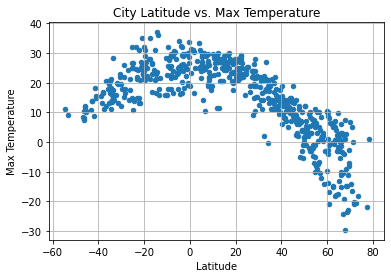

In [48]:
weather_data.plot(kind='scatter', x='Latitude', y='Max Temperature',grid=True, title='City Latitude vs. Max Temperature')
plt.savefig("Pictures/lat_temp.png")

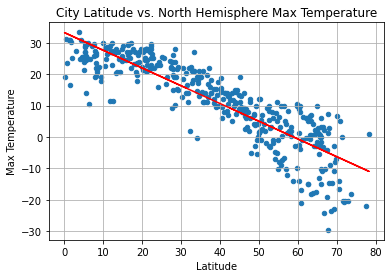

In [49]:
north_hem = weather_data.loc[weather_data['Latitude'] > 0]
south_hem = weather_data.loc[weather_data['Latitude'] < 0]
north_hem.plot(kind='scatter', x='Latitude', y='Max Temperature',grid=True, title='City Latitude vs. North Hemisphere Max Temperature')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hem['Latitude'], north_hem['Max Temperature'])
regress_values = north_hem['Latitude'] * slope + intercept 
line_eq = 'y = ' + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(north_hem['Latitude'],regress_values,"r-")
plt.savefig("Pictures/lat_northtemp.png")

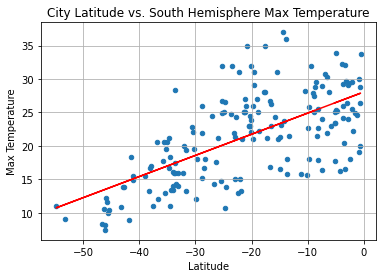

In [50]:
south_hem.plot(kind='scatter', x='Latitude', y='Max Temperature',grid=True, title='City Latitude vs. South Hemisphere Max Temperature')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hem['Latitude'], south_hem['Max Temperature'])
regress_values = south_hem['Latitude'] * slope + intercept 
line_eq = 'y = ' + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(south_hem['Latitude'],regress_values,"r-")
plt.savefig("Pictures/lat_southtemp.png")

#### Latitude vs. Humidity Plot

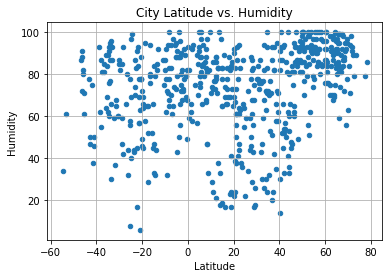

In [51]:
weather_data.plot(kind='scatter', x='Latitude', y='Humidity',grid=True, title='City Latitude vs. Humidity')
plt.savefig("Pictures/lat_humid.png")

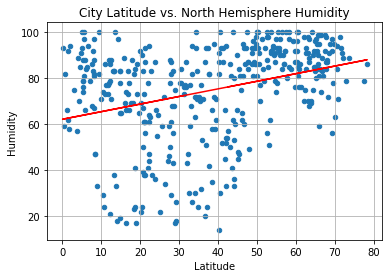

In [32]:
north_hem.plot(kind='scatter', x='Latitude', y='Humidity',grid=True, title='City Latitude vs. North Hemisphere Humidity')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hem['Latitude'], north_hem['Humidity'])
regress_values = north_hem['Latitude'] * slope + intercept 
line_eq = 'y = ' + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(north_hem['Latitude'],regress_values,"r-")

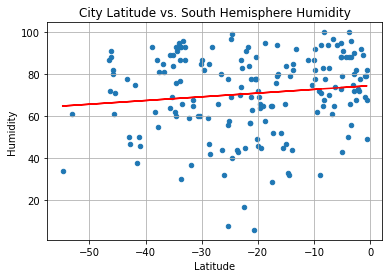

In [33]:
south_hem.plot(kind='scatter', x='Latitude', y='Humidity',grid=True, title='City Latitude vs. South Hemisphere Humidity')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hem['Latitude'], south_hem['Humidity'])
regress_values = south_hem['Latitude'] * slope + intercept 
line_eq = 'y = ' + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(south_hem['Latitude'],regress_values,"r-")

#### Latitude vs. Cloudiness Plot

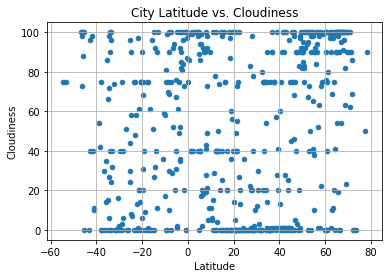

In [40]:
weather_data.plot(kind='scatter', x='Latitude', y='Cloudiness',grid=True, title='City Latitude vs. Cloudiness')

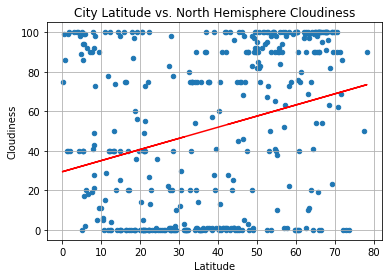

In [43]:
north_hem.plot(kind='scatter', x='Latitude', y='Cloudiness',grid=True, title='City Latitude vs. North Hemisphere Cloudiness')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hem['Latitude'], north_hem['Cloudiness'])
regress_values = north_hem['Latitude'] * slope + intercept 
line_eq = 'y = ' + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(north_hem['Latitude'],regress_values,"r-")

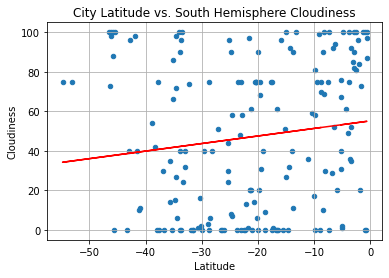

In [44]:
south_hem.plot(kind='scatter', x='Latitude', y='Cloudiness',grid=True, title='City Latitude vs. South Hemisphere Cloudiness')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hem['Latitude'], south_hem['Cloudiness'])
regress_values = south_hem['Latitude'] * slope + intercept 
line_eq = 'y = ' + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(south_hem['Latitude'],regress_values,"r-")

#### Latitude vs. Wind Speed Plot

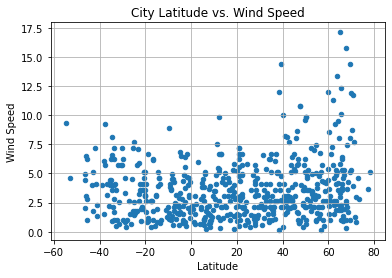

In [45]:
weather_data.plot(kind='scatter', x='Latitude', y='Wind Speed',grid=True, title='City Latitude vs. Wind Speed')

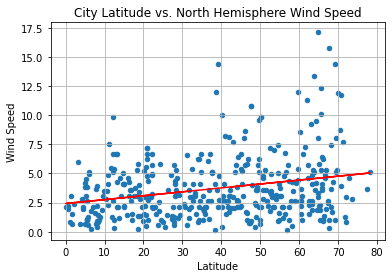

In [46]:
north_hem.plot(kind='scatter', x='Latitude', y='Wind Speed',grid=True, title='City Latitude vs. North Hemisphere Wind Speed')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hem['Latitude'], north_hem['Wind Speed'])
regress_values = north_hem['Latitude'] * slope + intercept 
line_eq = 'y = ' + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(north_hem['Latitude'],regress_values,"r-")

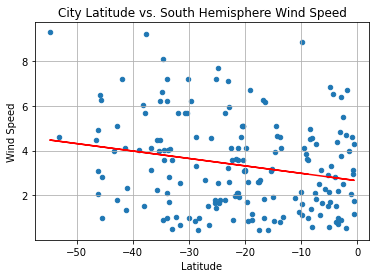

In [47]:
south_hem.plot(kind='scatter', x='Latitude', y='Wind Speed',grid=True, title='City Latitude vs. South Hemisphere Wind Speed')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hem['Latitude'], south_hem['Wind Speed'])
regress_values = south_hem['Latitude'] * slope + intercept 
line_eq = 'y = ' + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(south_hem['Latitude'],regress_values,"r-")